In [13]:
import string
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

In [2]:
#функция генератора начальных данных
def id_generator(size, chars=string.ascii_uppercase):
    return ''.join(random.choice(chars) for _ in range(size))

In [3]:
#функция поиска расстояния Д-Л и измерение трудоемкости
def damerau_levenshtein_distance(s1, s2):
    d = {}
    lenstr1 = len(s1)
    lenstr2 = len(s2)
    numOfOperations = 0 # единица измерения трудоёмкости

    for i in range(-1,lenstr1+1):
        d[(i,-1)] = i+1
    for j in range(-1,lenstr2+1):
        d[(-1,j)] = j+1
 
    for i in range(lenstr1):
        for j in range(lenstr2):
            if s1[i] == s2[j]:
                cost = 0 # cost - cost of operation
            else:
                cost = 1
                numOfOperations += 1
            d[(i,j)] = min(
                           d[(i-1,j)] + 1, # deletion
                           d[(i,j-1)] + 1, # insertion
                           d[(i-1,j-1)] + cost, # substitution
                          )
            if i and j and s1[i]==s2[j-1] and s1[i-1] == s2[j]:
                d[(i,j)] = min (d[(i,j)], d[i-2,j-2] + cost) # transposition
 
    return d[lenstr1-1,lenstr2-1], numOfOperations

s1 = 'QWERTYU'
s2 = 'QEWRLU'

distance, number = damerau_levenshtein_distance(s1, s2)

print("Damerau–Levenshtein distance:")
print(distance)
print("\n")
print("number Of Operations:")
print(number)

Damerau–Levenshtein distance:
3


number Of Operations:
37


In [9]:
# вычислительный эксперимент в исследуемом диапазоне размеров входных данных
# пусть N = M

arr_numOfOperations = np.zeros(10)
arr_N = np.zeros(10)
arr_M = np.zeros(10)
N = 100
M = 10

for i in range(10):
    s1 = id_generator(N)
    s2 = id_generator(M)
    dist, arr_numOfOperations[i] = damerau_levenshtein_distance(s1, s2)
    arr_N[i] = N
    arr_M[i] = M
    N += 100
    M += 10

print("Значения трудоемкости:")
print(arr_numOfOperations)
print("\n")
print("Входные данные:")
print("N:")
print(arr_N)
print("M:")
print(arr_M)



Значения трудоемкости:
[  972.  3843.  8655. 15377. 24020. 34613. 47067. 61569. 77926. 96234.]


Входные данные:
N:
[ 100.  200.  300.  400.  500.  600.  700.  800.  900. 1000.]
M:
[ 10.  20.  30.  40.  50.  60.  70.  80.  90. 100.]


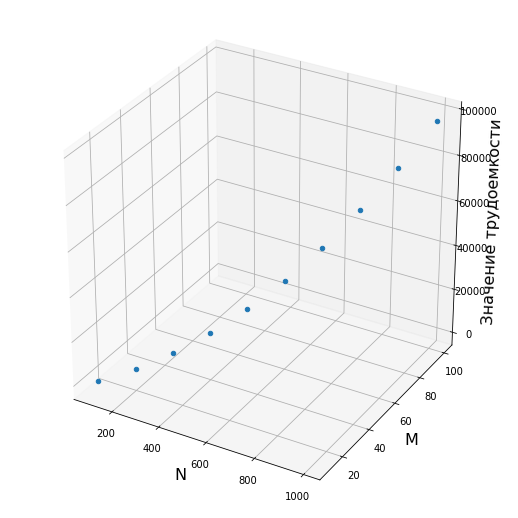

In [25]:
# построение графика зависимости

#plt.plot(arr_N, arr_numOfOperations);
#plt.xlabel('N', fontsize=14)
#plt.ylabel('Значение трудоемкости', fontsize=14)

#plt.title(r'Изменение трудоемкости в зависимости от длины строк', fontsize=16, y=1.05);

fig = plt.figure(figsize=(7,7))
ax = Axes3D(fig)
x = arr_N;
y = arr_M;
z = arr_numOfOperations

ax.scatter(x, y, z, marker = 'o', depthshade = False)
ax.set_xlabel('N', fontsize=16)
ax.set_ylabel('M', fontsize=16)
ax.set_zlabel('Значение трудоемкости', fontsize=16)

plt.show();